In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from toolbox import *

In [2]:
# load data
df = pd.read_csv("weatherHistory.csv")

In [3]:
#clean data
df = remove_df_outliers_iqr(df)
X, y = split_data(df)

c:\Users\Madina\Desktop\My best semester\Romania\software _packages\toolbox.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < lower_limit] = None
c:\Users\Madina\Desktop\My best semester\Romania\software _packages\toolbox.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] > upper_limit] = None


In [4]:
column = "Wind Bearing (degrees)"

x_component = np.cos(X[column])
y_component = np.sin(X[column])

x0 = np.mean(x_component)
y0 = np.mean(y_component)

np.arctan2(y0, x0)

0.044006030138693655

In [5]:
np.mean(X[column])

186.5705147730734

In [6]:
# 180 degrees ... PI radians
# 186.57 degrees ... ?
#
# 186.57 * PI = 180 * ?
# ? = 186.57 * PI / 180

np.pi * np.mean(X[column]) / 180

3.256269769930852

In [7]:
X["Wind Bearing (Ox)"] = x_component
X["Wind Bearing (Oy)"] = y_component
X = X.drop("Wind Bearing (degrees)", axis=1)
X.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (Ox),Wind Bearing (Oy)
0,9.472222,7.388889,0.89,14.1197,15.8263,1015.13,0.946878,-0.321594
1,9.355556,7.227778,0.86,14.2646,15.8263,1015.63,0.180401,0.983593
2,9.377778,9.377778,0.89,3.9284,14.9569,1015.94,-0.979361,0.202120
3,8.288889,5.944444,0.83,14.1036,15.8263,1016.41,0.383726,-0.923447
4,8.755556,6.977778,0.83,11.0446,15.8263,1016.51,0.180401,0.983593


In [8]:
corr_matrix = compute_correlation_matrix(X)
X = remove_correlated_columns(corr_matrix, X)

X.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (Ox),Wind Bearing (Oy)
0,9.472222,0.89,14.1197,15.8263,1015.13,0.946878,-0.321594
1,9.355556,0.86,14.2646,15.8263,1015.63,0.180401,0.983593
2,9.377778,0.89,3.9284,14.9569,1015.94,-0.979361,0.202120
3,8.288889,0.83,14.1036,15.8263,1016.41,0.383726,-0.923447
4,8.755556,0.83,11.0446,15.8263,1016.51,0.180401,0.983593


In [9]:
np.unique(y)

array(['rain', 'snow'], dtype=object)

In [10]:
y[y == "rain"] = 0
y[y == "snow"] = 1
np.unique(y)

array([0, 1], dtype=object)

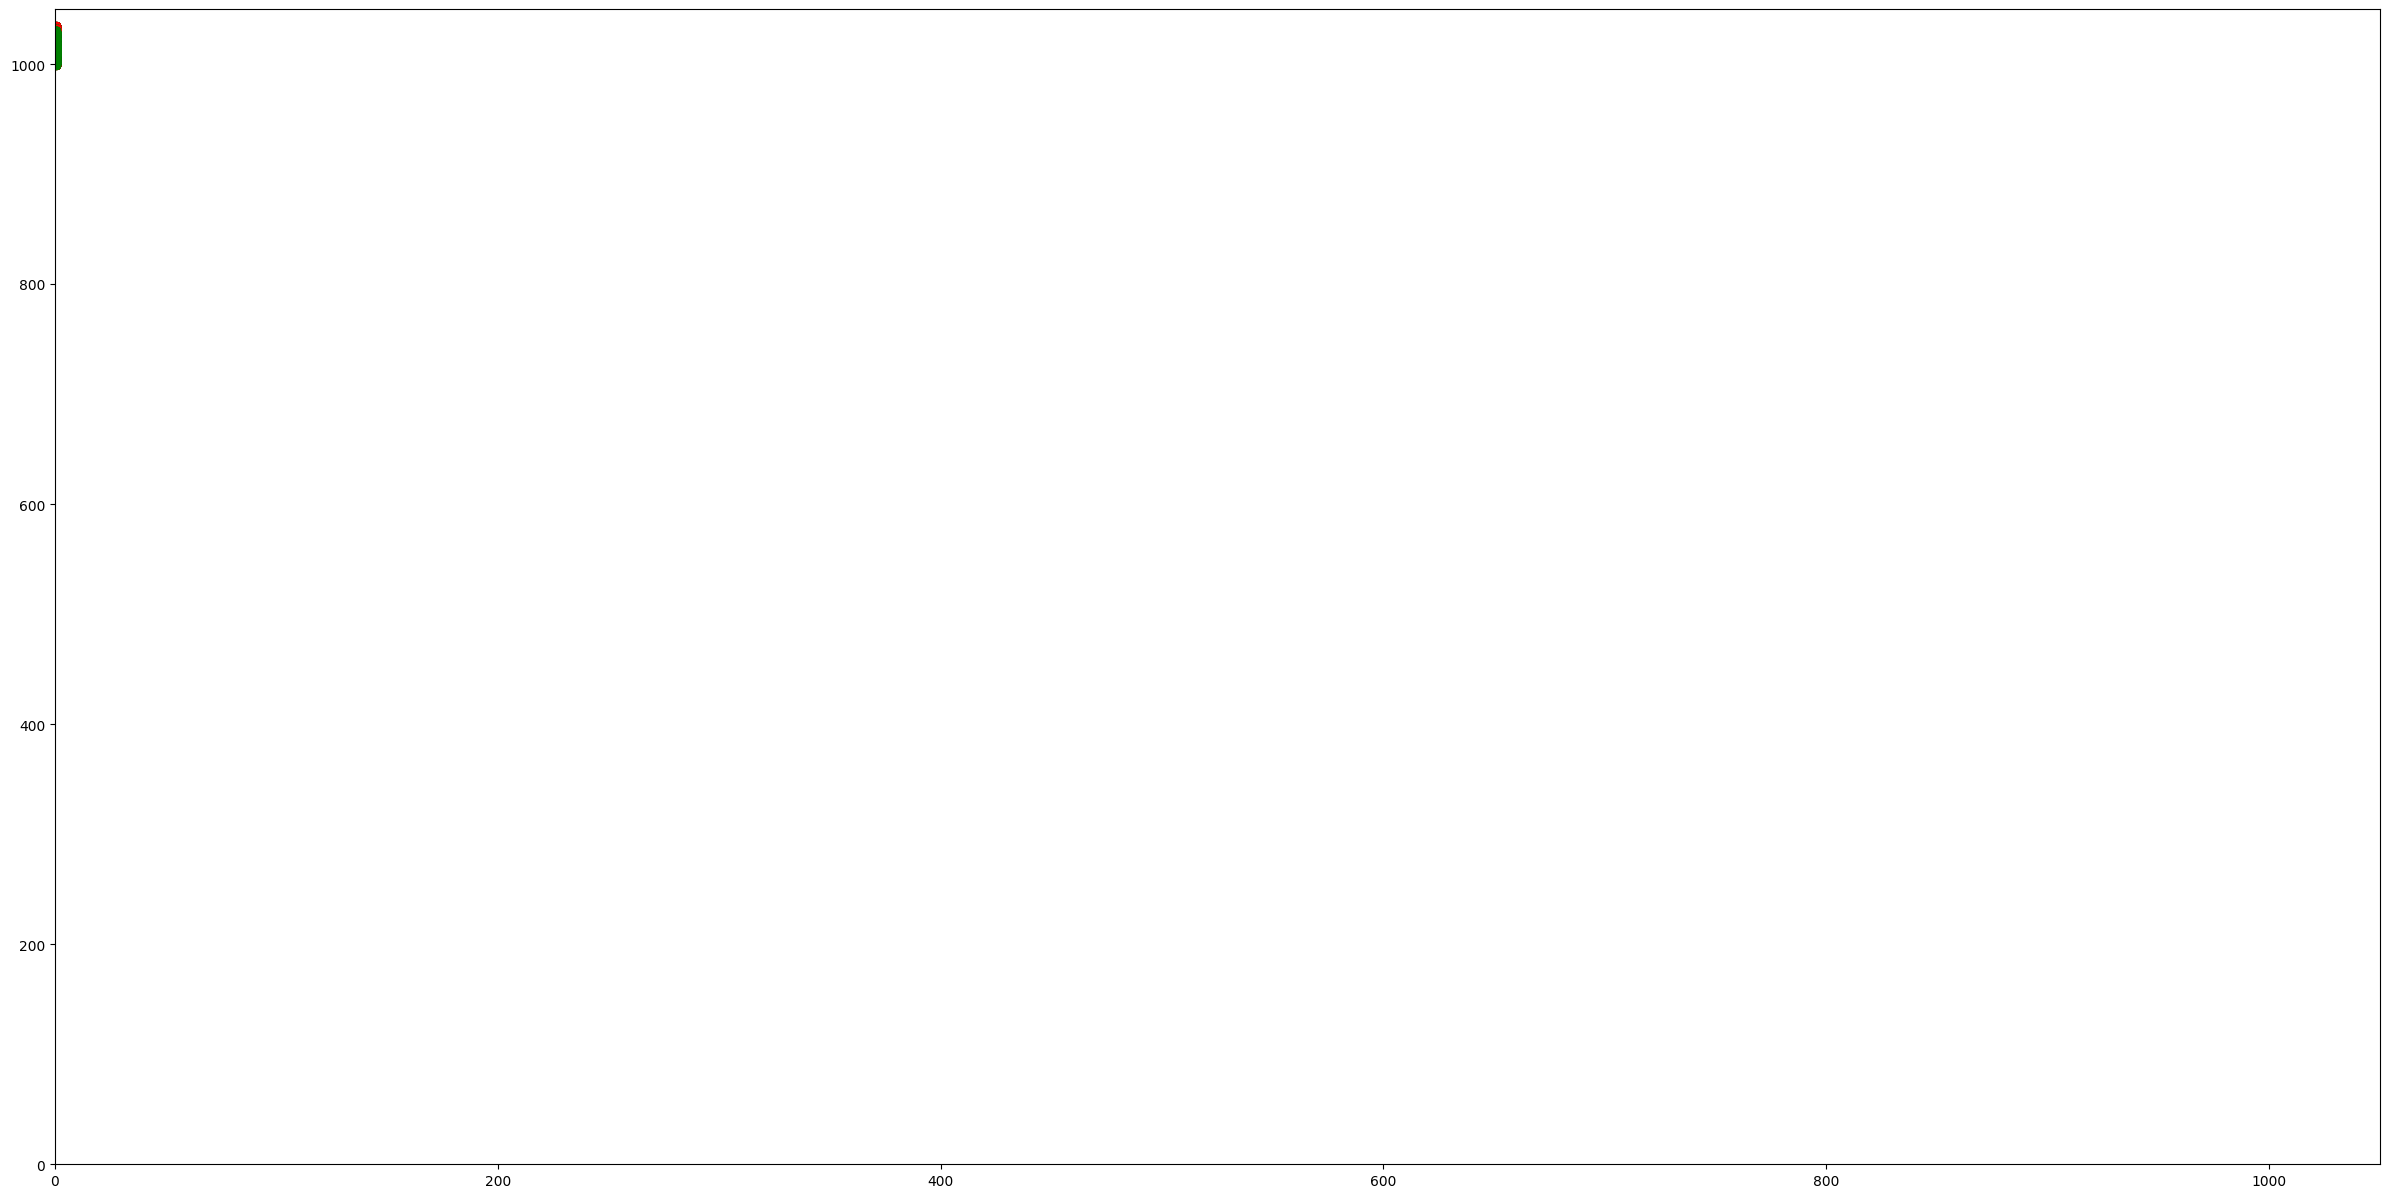

In [11]:
x1 = X["Humidity"]
x2 = X["Pressure (millibars)"]

color_map = {
    0: "green",
    1: "red",
    None: "magenta"
}

colors = []
for yi in y:
    colors.append(color_map[yi])

_ = plt.figure(figsize=(30,15))
plt.scatter(x1, x2, c = colors, s = 25)
plt.xlim(0, 1050)
plt.ylim(0, 1050)
plt.show()

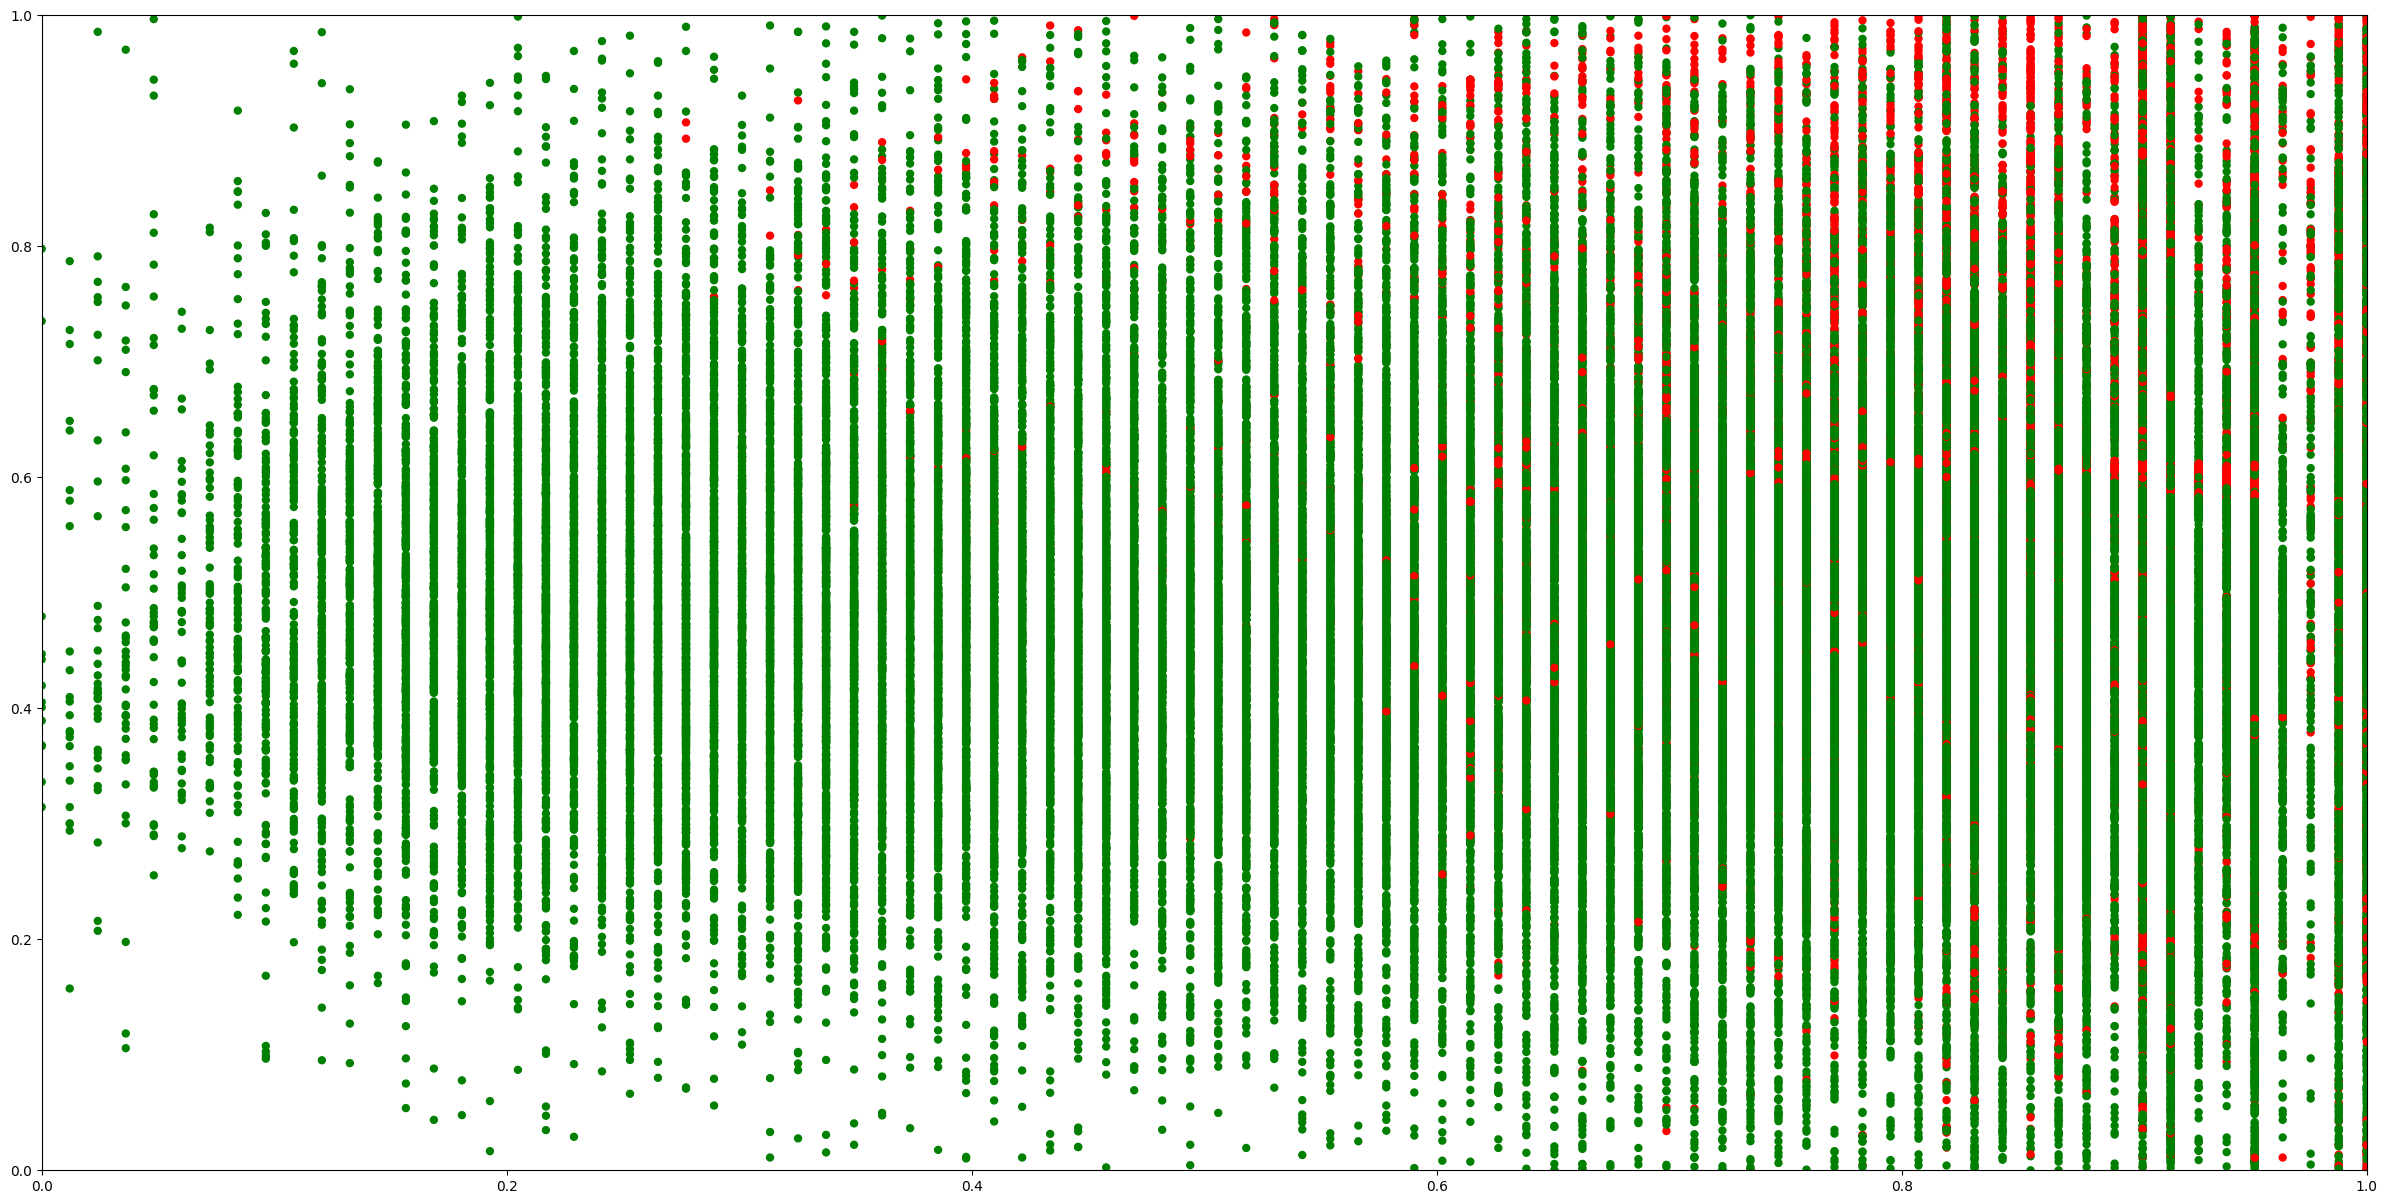

In [12]:
x1_scaled = min_max_scale(x1)
x2_scaled = min_max_scale(x2)

color_map = {
    0: "green",
    1: "red",
    None: "magenta"
}

colors = []
for yi in y:
    colors.append(color_map[yi])

_ = plt.figure(figsize=(30,15))
plt.scatter(x1_scaled, x2_scaled, c = colors, s = 25)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [13]:
for column in X.columns:
    X[column] = min_max_scale(X[column])

X.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (Ox),Wind Bearing (Oy)
0,0.464354,0.867470,0.530872,0.983,0.459139,0.973439,0.339215
1,0.462237,0.831325,0.536320,0.983,0.472943,0.590200,0.991840
2,0.462640,0.867470,0.147700,0.929,0.481502,0.010320,0.601085
3,0.442876,0.795181,0.530266,0.983,0.494478,0.691863,0.038274
4,0.451346,0.795181,0.415254,0.983,0.497239,0.590200,0.991840


In [14]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X_train.shape, X_test.shape

((70912, 7), (17729, 7))

In [17]:
clf = clf.fit(X_train, np.array(y_train, dtype=float))

[Text(0.5, 0.75, 'x[0] <= 0.292\ngini = 0.182\nsamples = 70912\nvalue = [63743, 7169]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7169\nvalue = [0, 7169]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 63743\nvalue = [63743, 0]')]

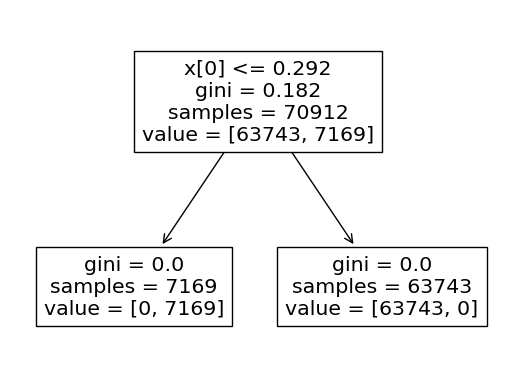

In [18]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [19]:
from sklearn.metrics import accuracy_score
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [20]:
train_acc = accuracy_score(np.array(y_train, dtype=float), y_train_pred)
test_acc = accuracy_score(np.array(y_test, dtype=float), y_test_pred)

In [21]:
print(f"Training set accuracy: {train_acc * 100} %. Test set accuracy: {test_acc * 100} %.")

Training set accuracy: 100.0 %. Test set accuracy: 100.0 %.


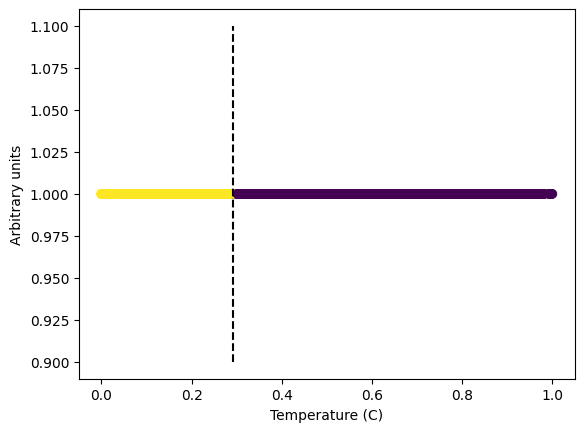

In [22]:
_ = plt.figure()
plt.scatter(np.array(X)[:, 0], np.ones((len(X), 1)), c=y)
plt.vlines(0.292, 0.9, 1.1, 'k', '--')
plt.xlabel("Temperature (C)")
plt.ylabel("Arbitrary units")
plt.show()

In [23]:
X1 = X.copy()
X1.drop(["Temperature (C)"], inplace = True, axis=1)
X1.head()

,Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (Ox),Wind Bearing (Oy)
0,0.867470,0.530872,0.983,0.459139,0.973439,0.339215
1,0.831325,0.536320,0.983,0.472943,0.590200,0.991840
2,0.867470,0.147700,0.929,0.481502,0.010320,0.601085
3,0.795181,0.530266,0.983,0.494478,0.691863,0.038274
4,0.795181,0.415254,0.983,0.497239,0.590200,0.991840


In [24]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
y_train = np.array(y_train, dtype=float)
y_test = np.array(y_test, dtype=float)

In [27]:
clf2 = DecisionTreeClassifier(max_depth=5)
clf2 = clf2.fit(X1_train, y_train)

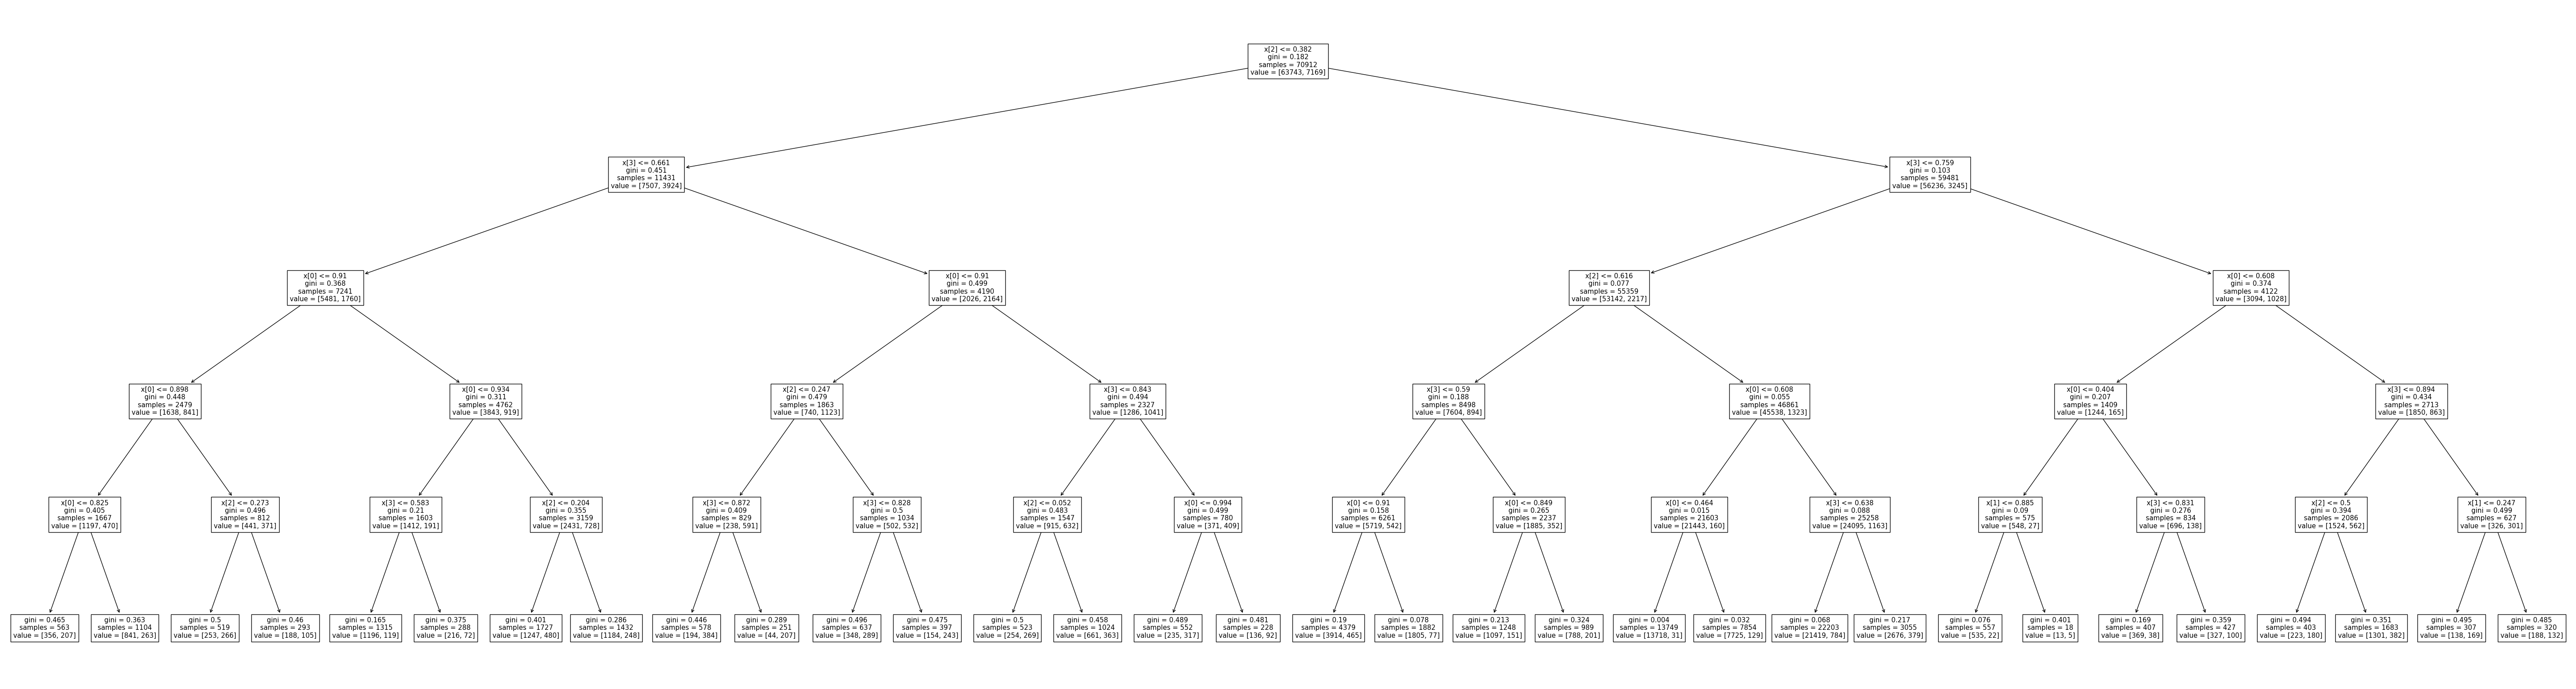

In [29]:
fig = plt.figure(figsize=(75, 20))
plot_tree(clf2, ax=fig.gca())
plt.show()

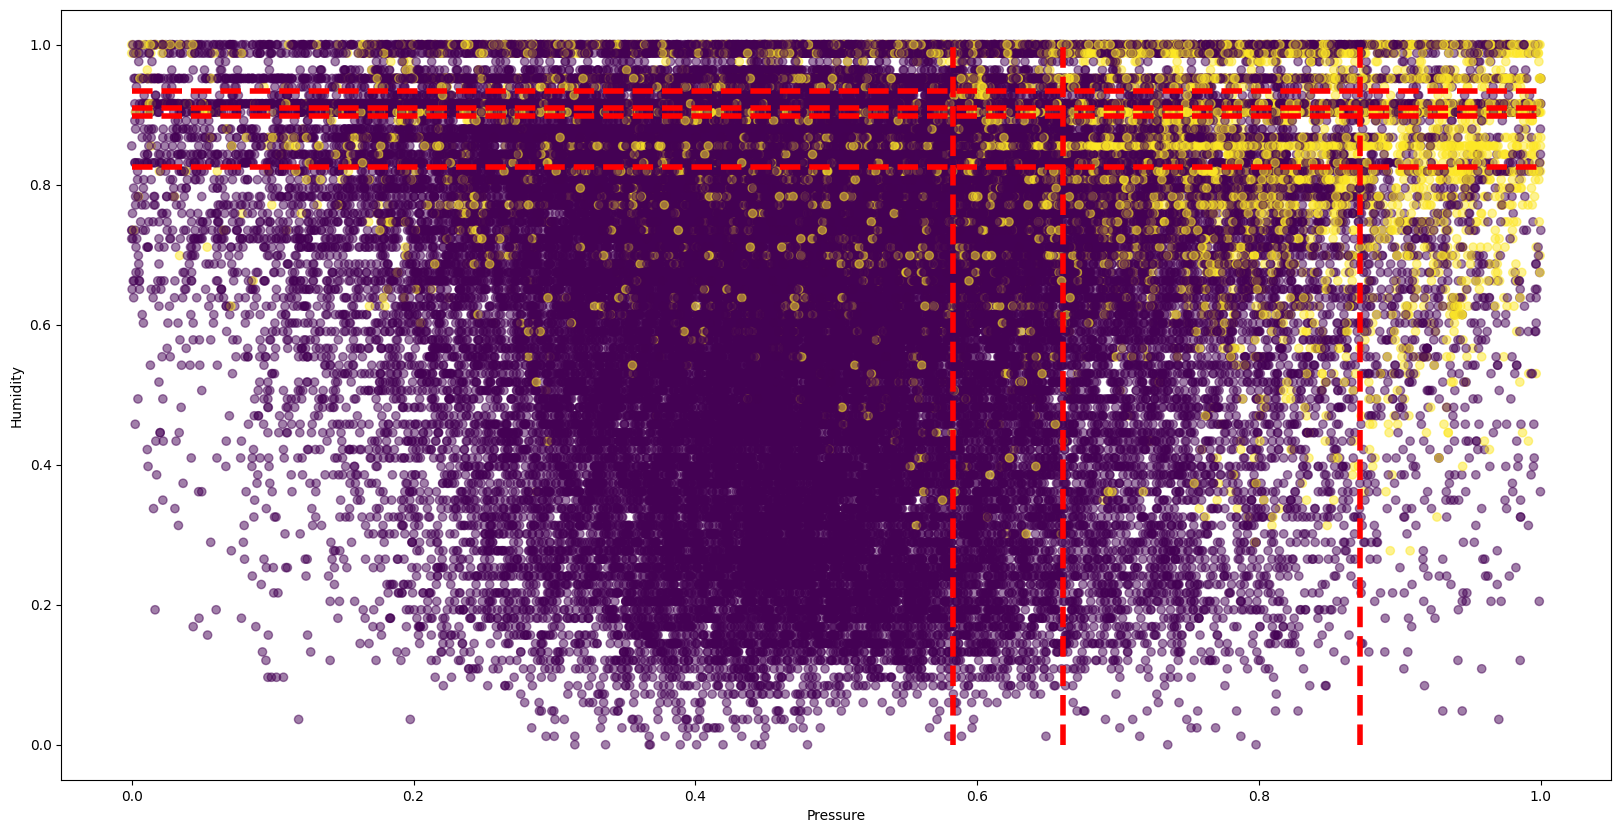

In [30]:
_ = plt.figure(figsize=(20, 10))
plt.scatter(np.array(X1_train)[:, 3], np.array(X1_train)[:, 0], c=y_train, alpha=0.5)
plt.vlines(0.661, 0, 1, "red", "--", lw=4)
plt.hlines(0.91, 0, 1, "red", "--", lw=4)
plt.hlines(0.898, 0, 1, "red", "--", lw=4)
plt.hlines(0.825, 0, 1, "red", "--", lw=4)
plt.hlines(0.934, 0, 1, "red", "--", lw=4)
plt.vlines(0.583, 0, 1, "red", "--", lw=4)
plt.vlines(0.872, 0, 1, "red", "--", lw=4)
plt.ylabel("Humidity")
plt.xlabel("Pressure")
plt.show()